<a href="https://colab.research.google.com/github/Prachi09062003/Deep_learning_pracs/blob/main/Optimizers_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Batch Gradient Descent
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100,1)),X]
def batch_gradient_descent(X,y,learning_rate=0.1,n_itertations=100):
  m = len(y)
  theta = np.random.randn(2,1)
  print("Theta:",theta)
  for iteration in range(n_itertations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
  return theta

theta_bgd = batch_gradient_descent(X_b,y)
print("BGD theta:",theta_bgd)

Theta: [[0.01300189]
 [1.45353408]]
BGD theta: [[4.16104533]
 [2.81783733]]


In [ ]:
#Perform Stochastic gradient descent
def stochastic_gradient_descent(X,y,learning_rate=0.1,n_epochs=50):
  m = len(y)
  theta = np.random.randn(2,1)
  for epoch in range(n_epochs):
    for i in range(m):
      random_index = np.random.randint(m)
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - learning_rate * gradients
  return theta

theta_sgd = stochastic_gradient_descent(X_b,y)
print("SGD theta:",theta_sgd)

SGD theta: [[4.00597696]
 [2.27516959]]


MBGD theta: [[4.21608467]
 [2.77506002]]
[[0]
 [2]]


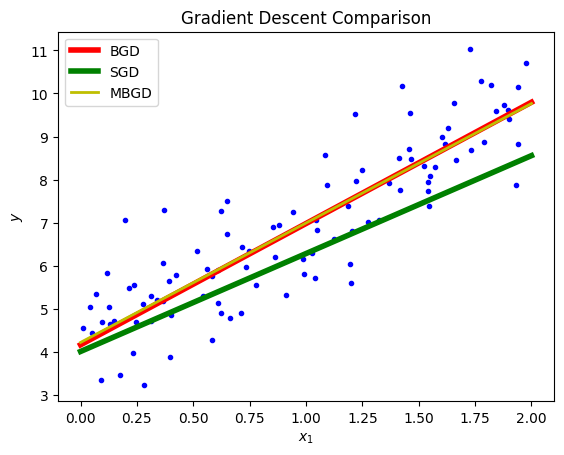

In [ ]:
#peform mini batch gradient descent
def mini_batch_gradient_descent(X,y,learning_rate=0.1,n_iterations=50,batch_size=20):
  m = len(y)
  theta = np.random.randn(2,1)
  for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,batch_size):
      xi = X_b_shuffled[i:i+batch_size]
      yi = y_shuffled[i:i+batch_size]
      gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - learning_rate * gradients
  return theta

theta_mbgd = mini_batch_gradient_descent(X_b,y)
print("MBGD theta:",theta_mbgd)

#Plot the results
def plot_gradient_descent(X,y,theta_bgd,theta_sgd,theta_mbgd):
  plt.plot(X,y,"b.")
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)),X_new]
  print(X_new)
  y_predict_bgd = X_new_b.dot(theta_bgd)
  y_predict_sgd = X_new_b.dot(theta_sgd)
  y_predict_mbgd = X_new_b.dot(theta_mbgd)
  plt.plot(X_new,y_predict_bgd,"r-",linewidth=4,label="BGD")
  plt.plot(X_new,y_predict_sgd,"g-",linewidth=4,label="SGD")
  plt.plot(X_new,y_predict_mbgd,"y-",linewidth=2,label="MBGD")
  plt.xlabel("$x_1$")
  plt.ylabel("$y$")
  plt.legend(loc="upper left")
  plt.title("Gradient Descent Comparison")
  plt.show()

plot_gradient_descent(X,y,theta_bgd,theta_sgd,theta_mbgd)

In [ ]:
#Advanced Optimizers
#momentum based
def gradient_descent_with_momentum(X,y,theta,learning_rate,gamma,num_iterations):
  m = len(y)
  velocity = np.zeros_like(theta)
  for i in range(num_iterations):
    gradients = (1/m) * X.T.dot(X.dot(theta) - y)
    velocity = gamma * velocity + learning_rate * gradients
    theta = theta - velocity
  return theta

X = np.array([[1,2],[3,4],[5,6]])
y = np.array([1,2,3])
theta = np.zeros(X.shape[1])
learning_rate = 0.1
gamma = 0.9
num_iterations = 1000
theta_momentum = gradient_descent_with_momentum(X,y,theta,learning_rate,gamma,num_iterations)
print("Optimized parameters using momentum:",theta_momentum)

Optimized parameters using momentum: [-1.89327171e-17  5.00000000e-01]


Theta: [[3.08910875]
 [3.73626968]]


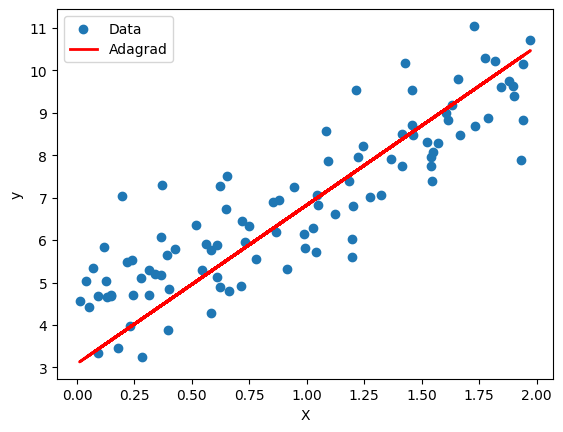

In [ ]:
#Adagrad
import numpy as np
import matplotlib.pyplot as plt

#Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100,1)),X]

#hyperparameters
learing_rate = 0.1
n_iterations = 1000
epsilon = 1e-8

#initalize parameters
theta = np.random.randn(2,1)
gradient_accum = np.zeros((2,1))

#Adagrad optimization
for iteration in range(n_iterations):
  gradients = 2/len(X_b) * X_b.T.dot(X_b.dot(theta) - y)
  gradient_accum += gradients**2
  adjusted_gradients = gradients / (np.sqrt(gradient_accum) + epsilon)
  theta -= learning_rate * adjusted_gradients

print("Theta:",theta)

#plot the results
plt.scatter(X,y,label = 'Data')
plt.plot(X,X_b.dot(theta),color='red',linewidth=2,label='Adagrad')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Iteration 0: theta = [0.04462467 1.48515685]
Iteration 100: theta = [1.07786423 2.51389943]
Iteration 200: theta = [2.01174243 3.43157981]
Iteration 300: theta = [2.86132774 3.8433582 ]
Iteration 400: theta = [3.76955127 3.11241066]
Iteration 500: theta = [4.22005258 2.77552917]
Iteration 600: theta = [4.22009777 2.77511501]
Iteration 700: theta = [4.22009614 2.77511337]
Iteration 800: theta = [4.22009615 2.77511338]
Iteration 900: theta = [4.22009615 2.77511338]
Theta: [[4.21009616]
 [2.76511339]]


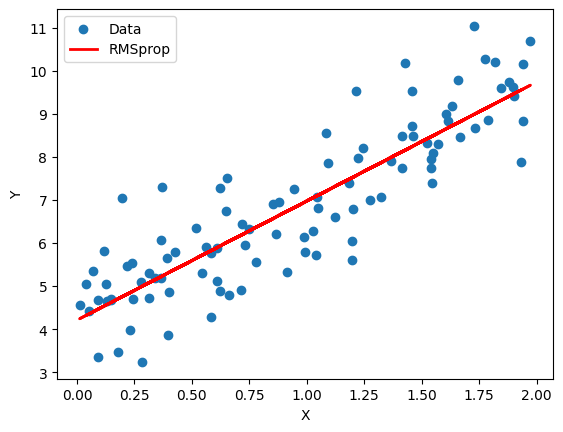

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # Add bias term

# Hyperparameters
learning_rate = 0.01
epsilon = 1e-8
beta = 0.9
num_iterations = 1000

# Initialize parameters
theta = np.random.randn(2, 1)
s = np.zeros((2, 1))  # Initialize the running average of squared gradients

# RMSprop optimization
for iteration in range(num_iterations):
    gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(theta) - y)
    s = beta * s + (1 - beta) * gradients ** 2  # Update the running average of squared gradients
    adjusted_gradients = gradients / (np.sqrt(s) + epsilon)
    theta -= learning_rate * adjusted_gradients

    if iteration % 100 == 0:
        print(f"Iteration {iteration}: theta = {theta.ravel()}")

print("Theta:", theta)

# Plotting the results
plt.scatter(X, y, label='Data')
plt.plot(X, X_b.dot(theta), color='red', linewidth=2, label='RMSprop')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
